In [1]:
import pygad
import numpy as np
from ipynb.fs.full.benchmark import *
from ipynb.fs.full.cell_lib import *
import matplotlib.pyplot as plt
import os


In [2]:
#smp_name = 'blood_smear_1'
#samples.query("method == 'Manual' & sample == '%s'"%smp_name)[['cells']].iloc(0)[0]['cells']

In [3]:
def fitness_func(solution, solution_idx):
    dp      = solution[0]
    minDist = int(solution[1])
    param1  = int(solution[2])
    param2  = int(solution[3])
    
    group = 'normal'
    
    error_sum = 0
    c = 0
    for i in range(1,16,1):
        path = "../samples/%s/blood_smear_%d.JPG" % (group,i)
        if os.path.exists(path):
            c += 1
            images, stats = hough_circles_method(path,dp,minDist,param1,param2)
            errors, img, manual = compare_markers("../samples/%s/blood_smear_%d_count.JPG"%(group, i), images[0])
    
    avg_err = error_sum/c
            
    return 1.0 - errors/100
    
    

In [4]:
fitness_function = fitness_func

num_generations = 50
num_parents_mating = 4

sol_per_pop = 8
num_genes = 4

gene_space = [{'low': 0.1, 'high': 5.0}, #dp
              {'low':1, 'high':30},#minDist
              {'low':1, 'high':100},#param1
              {'low':1, 'high':100}]#param2
              

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_num_genes = 1

In [5]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       gene_space=gene_space,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=mutation_num_genes)
ga_instance.run()

Parameters of the best solution : [ 3.810618   13.16435149 74.58658916 57.13882903]
Fitness value of the best solution = 0.95
Errors : 21


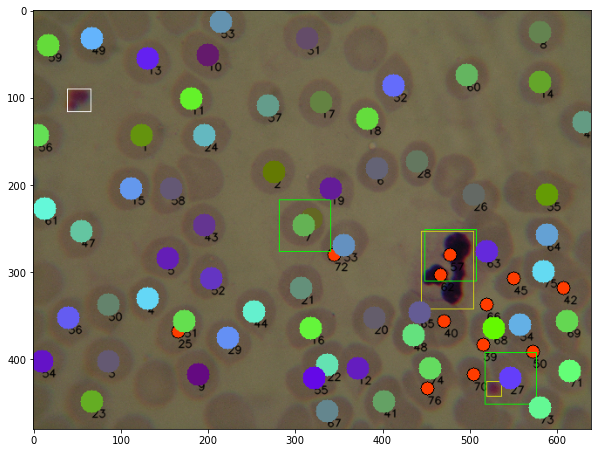

In [6]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Parameters of the best solution : {solution}".format(solution=solution))
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))

dp      = solution[0]
minDist = int(solution[1])
param1  = int(solution[2])
param2  = int(solution[3]) 
    
path = "../samples/normal/blood_smear_1.JPG"
images, stats = hough_circles_method(path,dp,minDist,param1,param2)
errors, img, manual = compare_markers("../samples/normal/blood_smear_1_count.JPG", images[0])

print("Errors : {errors}".format(errors=errors))

plt.imshow(img)
plt.show()

#[ 3.02097593 27.70264554 80.47278368 44.10014257]